### Problem Description - Predict the Insurance purchase(True/False) based on the data collected

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from sklearn import *
import seaborn as sns

In [2]:
#Loading Data
df = pd.read_csv("Caravan.csv")

In [3]:
df.head()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
0,33,1,3,2,8,0,5,1,3,7,...,0,0,0,1,0,0,0,0,0,0
1,37,1,2,2,8,1,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0
2,37,1,2,2,8,0,4,2,4,3,...,0,0,0,1,0,0,0,0,0,0
3,9,1,3,3,3,2,3,2,4,5,...,0,0,0,1,0,0,0,0,0,0
4,40,1,4,2,10,1,4,1,4,7,...,0,0,0,1,0,0,0,0,0,0


#### Data Set Description:
- The data contains 5822 real customer records
- Each record consists of 86 variables, containing sociodemographic data (variables 1-43) and product ownership (variables 44-86)
- All customers living in areas with the same zip code have the same sociodemographic attributes.
- Variable 86 (Purchase) indicates whether the customer purchased a caravan insurance policy.
- Detailed description of each data set available on  http://www.liacs.nl/~putten/library/cc2000/data.html
- Variable CARAVAN is the response variable 

In [4]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
count,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,...,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000,5822.000000
mean,24.253349,1.110615,2.678805,2.991240,5.773617,0.696496,4.626932,1.069907,3.258502,6.183442,...,0.005325,0.006527,0.004638,0.570079,0.000515,0.006012,0.031776,0.007901,0.014256,0.059773
std,12.846706,0.405842,0.789835,0.814589,2.856760,1.003234,1.715843,1.017503,1.597647,1.909482,...,0.072782,0.080532,0.077403,0.562058,0.022696,0.081632,0.210986,0.090463,0.119996,0.237087
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.000000,2.000000,2.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.000000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.000000,5.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,1.000000,1.000000,2.000000,7.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000


In [6]:
df.CARAVAN.value_counts()

0    5474
1     348
Name: CARAVAN, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 86 columns):
MOSTYPE     5822 non-null int64
MAANTHUI    5822 non-null int64
MGEMOMV     5822 non-null int64
MGEMLEEF    5822 non-null int64
MOSHOOFD    5822 non-null int64
MGODRK      5822 non-null int64
MGODPR      5822 non-null int64
MGODOV      5822 non-null int64
MGODGE      5822 non-null int64
MRELGE      5822 non-null int64
MRELSA      5822 non-null int64
MRELOV      5822 non-null int64
MFALLEEN    5822 non-null int64
MFGEKIND    5822 non-null int64
MFWEKIND    5822 non-null int64
MOPLHOOG    5822 non-null int64
MOPLMIDD    5822 non-null int64
MOPLLAAG    5822 non-null int64
MBERHOOG    5822 non-null int64
MBERZELF    5822 non-null int64
MBERBOER    5822 non-null int64
MBERMIDD    5822 non-null int64
MBERARBG    5822 non-null int64
MBERARBO    5822 non-null int64
MSKA        5822 non-null int64
MSKB1       5822 non-null int64
MSKB2       5822 non-null int64
MSKC        5822 non-null int

Note on the data:
- There are no NAN values in the database but it seems that the data needs standardization as mean values of  features  are spread out

In [12]:
y = df.CARAVAN
X = df.drop(['CARAVAN'],axis =1 )

In [15]:
# scaling the data for unit Standard deviation
X_scaled = preprocessing.scale(X, axis=0, with_mean=True, with_std=True, copy=True)

In [22]:
# TRain Test split
train_X,test_X,train_y,test_y = cross_validation.train_test_split(X_scaled,y,test_size = .2)

In [23]:
len(test_X)

1165

In [57]:
# creating a Data frame to hold the values of KNN results
df_eval = pd.DataFrame({'K':np.nan,'Train_score':np.nan,'CV_score':np.nan},index = [0])

In [58]:
for i in range(0,8):
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=i+1).fit(train_X,train_y)
    train_score = model_knn.score(train_X,train_y)
    cv_score = model_knn.score(train_X,train_y)
    
    df_eval.loc[i ,'K'] = i+1
    df_eval.loc[i ,'Train_score'] = train_score
    df_eval.loc[i ,'CV_score'] = cv_score
    
    

In [59]:
df_eval

,CV_score,K,Train_score
0,0.992484,1.0,0.992484
1,0.946532,2.0,0.946532
2,0.947391,3.0,0.947391
3,0.942023,4.0,0.942023
4,0.941593,5.0,0.941593
5,0.940734,6.0,0.940734
6,0.939875,7.0,0.939875
7,0.939875,8.0,0.939875


In [60]:
df_eval = df_eval.round(6)

In [61]:
df_eval

,CV_score,K,Train_score
0,0.992484,1.0,0.992484
1,0.946532,2.0,0.946532
2,0.947391,3.0,0.947391
3,0.942023,4.0,0.942023
4,0.941593,5.0,0.941593
5,0.940734,6.0,0.940734
6,0.939875,7.0,0.939875
7,0.939875,8.0,0.939875


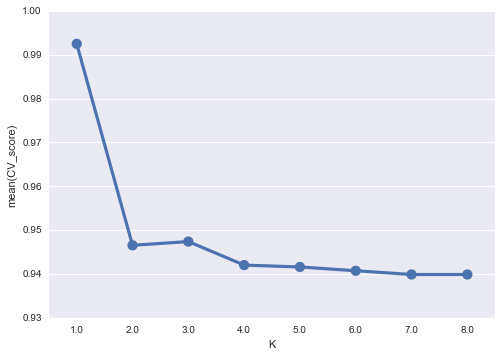

In [88]:
g = sns.pointplot(data = df_eval , x= df_eval.K , y = df_eval.CV_score)
g.plot(x= df_eval.K , y = df_eval.Train_score, color = 'k')
plt.show()

- KNN with K = 1 appears to be doing a great job on classification, but a with things are worh noting
    - The classes are highly imbalanced, only 6.3% of the total values are True Positive

### Stratified sampling

In [63]:
# The code below ensures that the classses are balanced by selecting equal no of positive and negative cases
y_0 = df[df.CARAVAN == 0]
y_1 = df[df.CARAVAN == 1]
n = min([len(y_0), len(y_1)])
y_0 = y_0.sample(n = n, random_state = 0)
y_1 = y_1.sample(n = n, random_state = 0)
df_strat = pd.concat([y_0, y_1])

In [72]:
len(df_strat)

696

In [64]:
# Creating predictors and response
y_strat = df_strat.CARAVAN
X_strat = df_strat.drop(['CARAVAN'],axis =1 )

In [65]:
# Scaling the variables to ensure all variables have the same impact on KNN
X_strat_scaled = preprocessing.scale(X_strat, axis=0, with_mean=True, with_std=True, copy=True)

In [67]:
# Train - Test split
train_X_strat,test_X_strat,train_y_strat,test_y_strat = cross_validation.train_test_split(X_strat_scaled,y_strat,test_size = .2)

In [73]:
len(train_X_strat)

556

In [74]:
# creating a Data frame to hold the values of KNN results
df_eval_strat = pd.DataFrame({'K':np.nan,'Train_score':np.nan,'CV_score':np.nan},index = [0])

In [75]:
for i in range(0,8):
    model_knn = neighbors.KNeighborsClassifier(n_neighbors=i+1).fit(train_X_strat,train_y_strat)
    train_score = model_knn.score(train_X_strat,train_y_strat)
    cv_score = model_knn.score(train_X_strat,train_y_strat)
    
    df_eval_strat.loc[i ,'K'] = i+1
    df_eval_strat.loc[i ,'Train_score'] = train_score
    df_eval_strat.loc[i ,'CV_score'] = cv_score
    
    

In [76]:
df_eval_strat

,CV_score,K,Train_score
0,0.987410,1.0,0.987410
1,0.789568,2.0,0.789568
2,0.800360,3.0,0.800360
3,0.748201,4.0,0.748201
4,0.750000,5.0,0.750000
5,0.708633,6.0,0.708633
6,0.708633,7.0,0.708633
7,0.705036,8.0,0.705036


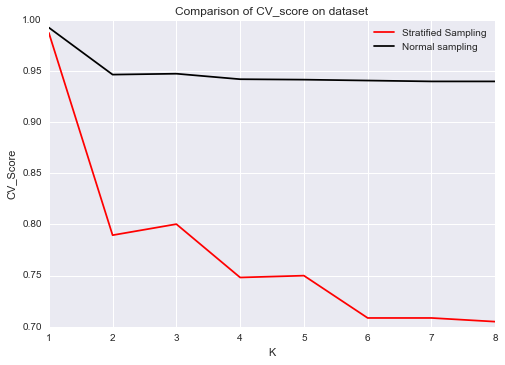

In [86]:
plt.plot(df_eval_strat.K , df_eval_strat.CV_score,color = 'r',label = 'Stratified Sampling')
plt.plot(df_eval.K , df_eval.CV_score, color = 'k',label = 'Normal sampling')
plt.legend(loc = 'best')
plt.xlabel('K')
plt.ylabel('CV_Score')
plt.title('Comparison of CV_score on dataset')
plt.show()

Conclusion -
- Stratified sampling seem to provide a more realistsic pattern on prediction
- K =3 on stratified sampling seems to be the best choice

###     Prediction

In [91]:
model_knn_final = neighbors.KNeighborsClassifier(n_neighbors = 3).fit(test_X , test_y)
model_knn_final.score(test_X , test_y)

0.95021459227467808

KNN with K = 3 gives a 95% accuracy on the Data

## Logistic Regression

0.71762589928057552

In [95]:
y_hat_prob = model_logit.predict_proba(train_X_strat)

In [108]:
y_hat_prob

array([[ 0.00263595,  0.99736405],
       [ 0.16377679,  0.83622321],
       [ 0.4708278 ,  0.5291722 ],
       ..., 
       [ 0.87670424,  0.12329576],
       [ 0.66635528,  0.33364472],
       [ 0.56218639,  0.43781361]])

### The function below predicts the class_labels based on the value of the Threshold passed
- the function can be used for any generic business specific purposes when the classifier has to predict True Positives based on the value of the Threshold
- The function also plots the data

In [143]:
# def predict_labels(train_X_strat , train_y_strat , test_X_strat , test_y_strat, threshold ):
#     # COmputing the probabilities
#     #Empty list to hold the values of predicted Labels
    
    
#     predicted_labels=[]
#     model_logit = linear_model.LogisticRegression().fit(train_X_strat , train_y_strat)
#     model_logit.score(train_X_strat , train_y_strat)
#     y_hat_prob = model_logit.predict_proba(test_X_strat)
#     #y_hat_prob is a nx2 matrix, the loop below computes the maximum probability
    
#     for i in range(0,len(y_hat_prob)):
#         elem_1 = y_hat_prob[i,0]
#         elem_2 = y_hat_prob[i,1]
        
#         if (elem_1 > elem_2):
#             label = elem_1
#         else:
#             label = elem_2
#         if label > threshold:
#             # We predict positive when the probability > Threshold
            
#             predicted_labels.append(1)
#         else :
#             # We predict positive when the probability < Threshold
#             predicted_labels.append(0)
#     return  predicted_labels   
        
    
    

In [216]:
def predict_labels(train_X_strat , train_y_strat , test_X_strat , test_y_strat, threshold ):
    # COmputing the probabilities
    #Empty list to hold the values of predicted Labels
    
    
    predicted_labels=[]
    model_logit = linear_model.LogisticRegression().fit(train_X_strat , train_y_strat)
    model_logit.score(train_X_strat , train_y_strat)
    y_hat_prob = model_logit.predict_proba(test_X_strat)
    #y_hat_prob is a nx2 matrix, the loop below computes the maximum probability
    
    for i in range(0,len(y_hat_prob)):
        elem_1 = y_hat_prob[i,0]
        elem_2 = y_hat_prob[i,1]
        
        if (elem_1 > elem_2):
            label = elem_1
        else:
            label = elem_2
        if label > threshold:
            # We predict positive when the probability > Threshold
            
            predicted_labels.append(1)
        else :
            # We predict positive when the probability < Threshold
            predicted_labels.append(0)
    #return  predicted_labels   
    df_predictions = pd.DataFrame({'predictions':predictions},index = [0])
    y_lables = pd.DataFrame({'test_lables':test_y})
    df_comparison = pd.concat([df_predictions,y_lables])
    # This function plots the scatter plots between the predicted data and the labelled data
    plot_data(df_predictions , train_X_strat , test_y_strat)

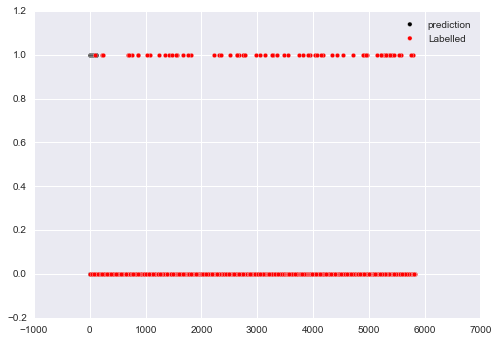

In [215]:
predictions = predict_labels(train_X_strat , train_y_strat , test_X_strat , test_y_strat, .2 )

In [212]:
def plot_data(df_predictions , test_X , test_y):
    
    
#     y_lables = pd.DataFrame({'test_lables':test_y})
#     df_comparison = pd.concat([df_predictions,y_lables])
    df_comparison['Accuracy'] = (df_comparison.predictions == df_comparison.test_lables)
    plt.scatter(x =df_comparison.index  , y=df_comparison.predictions,c ='k' , label = 'prediction')
    plt.scatter(x =df_comparison.index  , y=df_comparison.test_lables ,c = 'r' , label = 'Labelled')
    plt.legend(loc = 'best')
    plt.title('Predicted V/S Labelled')
    plt.show()
    #sns.swarmplot(x = "test" , y ="test_lables" , hue = "Accuracy" , data =  df_comparison)